In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [62]:
train_data_file = "final_data.csv"

In [63]:
data = pd.read_csv(train_data_file)
features = data.drop(["Unnamed: 0", "particle_key", "track_charge", "particle_fullInfo", "particle_hasScifi", "particle_pid", 'particle_eta',
       'particle_hasUT', 'particle_ovtx_x', 'particle_ovtx_y',
       'particle_ovtx_z', 'particle_evtx_x', 'particle_evtx_y',
       'particle_evtx_z', 'particle_p', 'particle_phi', 'particle_pt',
       'particle_px', 'particle_py', 'particle_pz'] , axis=1).astype(np.float64)
features

,track_chi2,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_phi,track_position_r,track_position_x,track_position_y,track_pt,track_tx,track_ty,track_pseudoRapidity,particle_hasVelo,particle_isDown,particle_isDown_noVelo,particle_isLong,particle_isLong_andUT
0,6.275086,0.896441,12.0,2020.072174,2.849378,1.156534,7599.958646,494.515198,1124.644897,682.012956,-0.343474,0.103326,1.749189,1.0,1.0,0.0,1.0,1.0
1,1.360128,0.194304,12.0,3841.771978,-3.082239,-3.011232,7578.755154,-1080.491943,-141.657471,1299.941130,-0.358948,-0.021330,1.746825,1.0,1.0,0.0,1.0,1.0
2,1.228229,0.204705,11.0,11831.335600,-0.011027,-0.021707,7503.689479,235.222702,-5.106698,1137.754221,0.096606,-0.001065,3.032522,0.0,0.0,0.0,0.0,0.0
3,1.397992,0.349498,9.0,1982.935289,3.105371,2.717953,7505.289515,-256.822998,115.813004,803.347165,-0.442834,0.016047,1.552877,0.0,0.0,0.0,0.0,0.0
4,1.731246,0.288541,11.0,6950.099982,-3.125277,-3.044312,7512.987296,-439.475525,-42.887833,1167.325690,-0.170356,-0.002780,2.470060,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12220867,1.130986,0.161569,12.0,8432.041643,0.384341,0.601163,7616.906864,1096.316650,751.904236,2151.576299,0.244650,0.098950,2.042295,1.0,1.0,0.0,1.0,1.0
12220868,2.102059,0.300294,12.0,5477.166299,0.254738,0.422818,7710.028460,1629.928833,733.396790,1979.434003,0.375086,0.097671,1.676546,1.0,1.0,0.0,1.0,1.0
12220869,1.260499,0.180071,12.0,12264.355936,2.339594,1.920959,7552.313442,-304.415100,833.528503,1840.049842,-0.105507,0.109070,2.584376,1.0,1.0,0.0,1.0,1.0
12220870,2.243527,0.373921,11.0,10770.814384,2.389310,2.064830,7621.024591,-641.463562,1191.024902,2364.653856,-0.164303,0.153767,2.197082,1.0,1.0,0.0,1.0,1.0


In [64]:
print(len(features))

12220872


In [65]:
features.columns.values

array(['track_chi2', 'track_chi2PerDoF', 'track_nLHCbIDs', 'track_p',
       'track_phi', 'track_position_phi', 'track_position_r',
       'track_position_x', 'track_position_y', 'track_pt', 'track_tx',
       'track_ty', 'track_pseudoRapidity', 'particle_hasVelo',
       'particle_isDown', 'particle_isDown_noVelo', 'particle_isLong',
       'particle_isLong_andUT'], dtype=object)

In [67]:
featuresTAll = features[((features.particle_isDown == 1)&(features.particle_hasVelo == 0)&(features.particle_isLong_andUT == 0))].drop(['particle_hasVelo', 'particle_isDown', 'particle_isDown_noVelo', 'particle_isLong', 'particle_isLong_andUT'], axis = 1)
featuresFAll = features[((features.particle_isDown == 0)|(features.particle_hasVelo == 1)&(features.particle_isLong_andUT == 0))].drop(['particle_hasVelo', 'particle_isDown', 'particle_isDown_noVelo', 'particle_isLong', 'particle_isLong_andUT'], axis = 1)

if len(featuresTAll) < len(featuresFAll) :()
    featuresT = featuresTAll
    featuresF = featuresFAll.sample(len(featuresTAll))
else:
    featuresT = featuresTAll.sample(len(featuresFAll))
    featuresF = featuresFAll

print(len(featuresTAll),len(featuresFAll),len(featuresTAll)+len(featuresFAll))

1769906 3549788 5319694


In [68]:
def drawPlot(coll, binsnum, xmax = None, xmin = 0):
    T = featuresT[coll].values
    F = featuresF[coll].values
    if xmax != None:
        plt.hist(T, bins = binsnum, alpha=0.5, label='T', range = (xmin, xmax))
        plt.hist(F, bins = binsnum, alpha=0.5, label='F', range = (xmin, xmax))
    else:
        plt.hist(T, bins = binsnum, alpha=0.5, label='T')
        plt.hist(F, bins = binsnum, alpha=0.5, label='F')
    plt.legend(loc='upper right')
    plt.title(coll)
    plt.show()

In [69]:
featuresT.head(5)

,track_chi2,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_phi,track_position_r,track_position_x,track_position_y,track_pt,track_tx,track_ty,track_pseudoRapidity
51,9.795560,1.632593,11.0,10435.038529,-0.967692,-1.697222,7533.204561,-89.084892,-700.881470,1159.610043,0.063424,-0.092092,2.887131
54,4.108515,0.586931,12.0,3048.193672,3.098945,2.991682,7564.441325,-974.227478,147.150864,1154.348326,-0.408802,0.017445,1.626209
81,2.679403,0.382772,12.0,3247.641630,0.018973,0.085211,7529.146607,659.451050,56.328819,1031.584935,0.334930,0.006355,1.813744
82,1.694528,0.282421,11.0,3307.302934,3.126251,3.089524,7583.350743,-1119.733521,58.355282,1242.110855,-0.405183,0.006217,1.635179
87,1.243228,0.177604,12.0,2656.758174,3.110193,1.988466,7501.867569,-67.895752,152.994095,765.697081,-0.300830,0.009449,1.915778


In [70]:
featuresF.head(5)

,track_chi2,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_phi,track_position_r,track_position_x,track_position_y,track_pt,track_tx,track_ty,track_pseudoRapidity
10974031,3.339077,0.477011,12.0,11580.251857,2.989141,3.024775,7505.939277,-296.502502,34.795120,1221.113830,-0.104809,0.016103,2.939894
3471951,7.992497,1.141785,12.0,6088.290772,-3.082967,-2.922464,7509.250751,-363.711182,-81.000145,1058.104060,-0.176176,-0.010340,2.435398
2857173,3.625850,0.517979,12.0,31009.004413,0.162660,0.193992,7501.030024,121.972137,23.962975,1292.329852,0.041162,0.006755,3.870544
2973912,3.730507,0.532930,12.0,5064.126382,-3.100833,-3.029896,7515.802998,-484.093445,-54.297733,1085.960258,-0.219367,-0.008946,2.221164
10669965,9.060276,1.510046,11.0,5185.657596,-3.038979,-3.138542,7502.161173,-180.061005,-0.549326,866.931493,-0.168673,-0.017369,2.474778


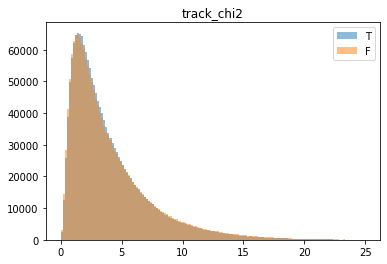

In [71]:
drawPlot("track_chi2", 150, 25)

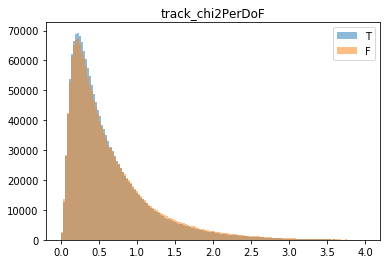

In [72]:
drawPlot("track_chi2PerDoF", 150 , 4)

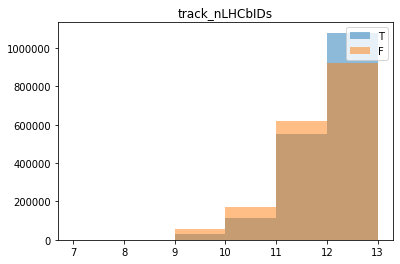

In [73]:
drawPlot("track_nLHCbIDs", 6, 13, 7)

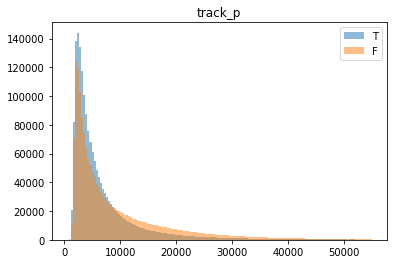

In [74]:
drawPlot("track_p", 150, 55000, 500)

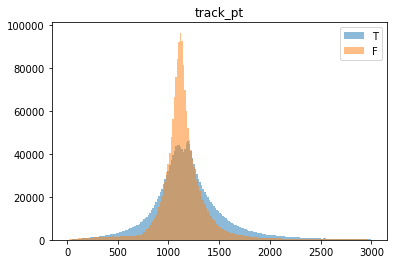

In [82]:
drawPlot("track_pt", 200, 3000)

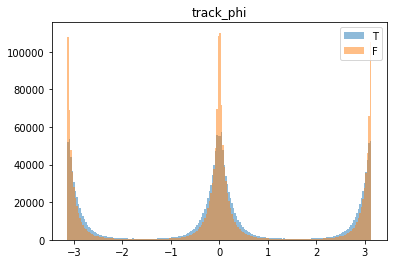

In [76]:
drawPlot("track_phi", 200)

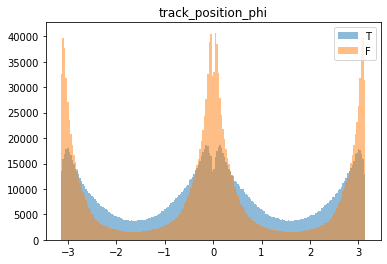

In [77]:
drawPlot("track_position_phi", 200)

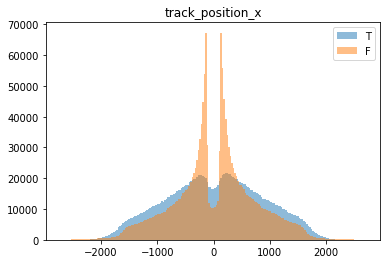

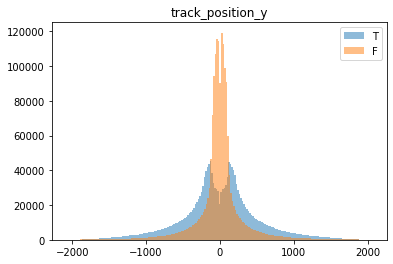

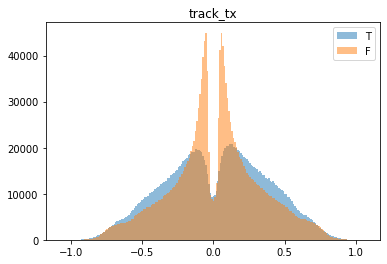

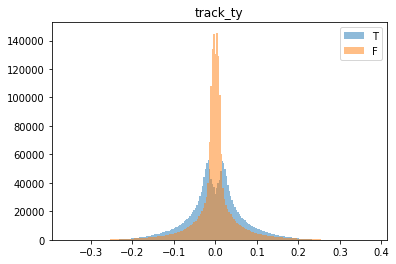

In [78]:
drawPlot("track_position_x", 200)
drawPlot("track_position_y", 200)
drawPlot("track_tx", 200)
drawPlot("track_ty", 200)

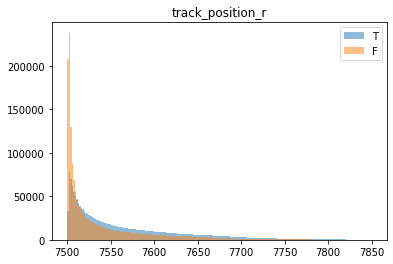

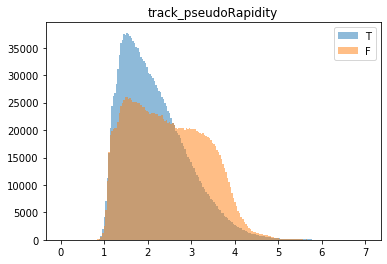

In [79]:
drawPlot("track_position_r", 200, 7850, 7500)
drawPlot("track_pseudoRapidity", 200, 7)

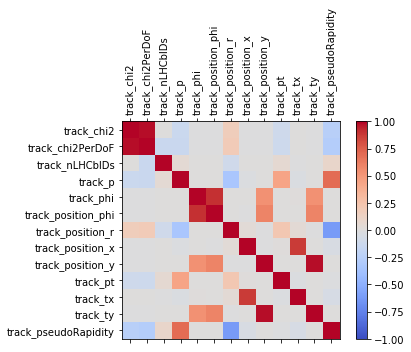

In [80]:
corr = featuresT.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(featuresT.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(featuresT.columns)
ax.set_yticklabels(featuresT.columns)
plt.show()

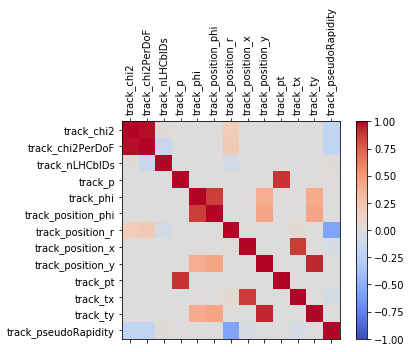

In [81]:
corr = featuresF.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(featuresF.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(featuresF.columns)
ax.set_yticklabels(featuresF.columns)
plt.show()

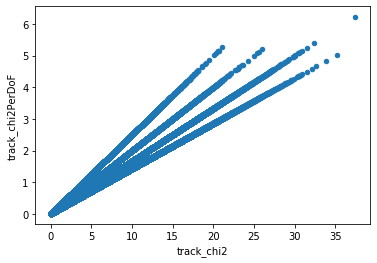

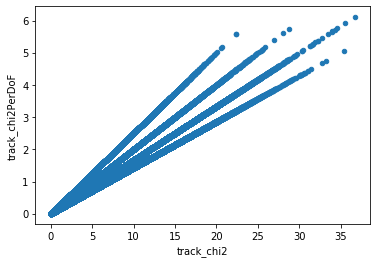

In [111]:
featuresT.plot.scatter(x='track_chi2', y='track_chi2PerDoF')
featuresF.plot.scatter(x='track_chi2', y='track_chi2PerDoF')

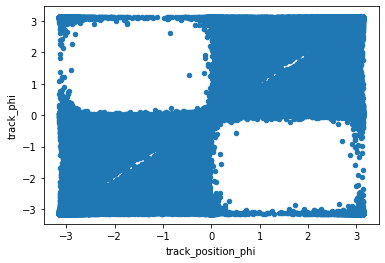

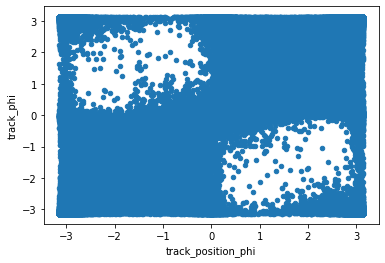

In [112]:
featuresT.plot.scatter(x='track_position_phi', y='track_phi')
featuresF.plot.scatter(x='track_position_phi', y='track_phi')

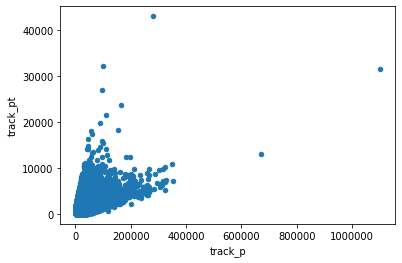

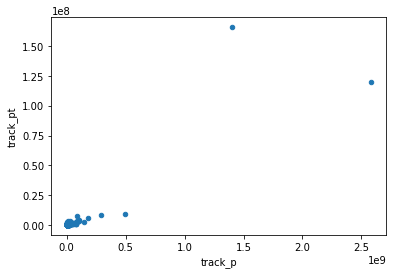

In [113]:
featuresT.plot.scatter(x='track_p', y='track_pt')
featuresF.plot.scatter(x='track_p', y='track_pt')

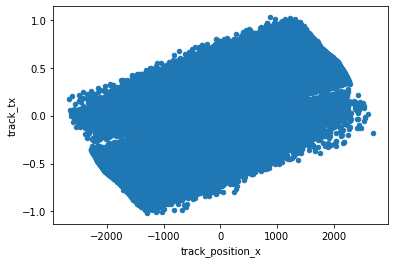

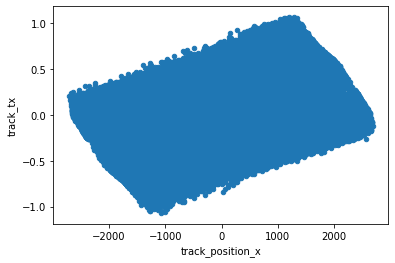

In [114]:
featuresT.plot.scatter(x='track_position_x', y='track_tx')
featuresF.plot.scatter(x='track_position_x', y='track_tx')

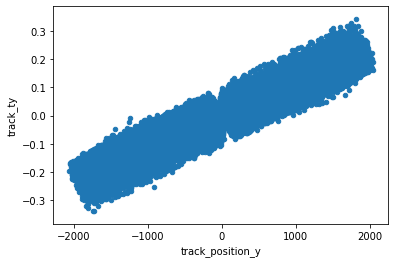

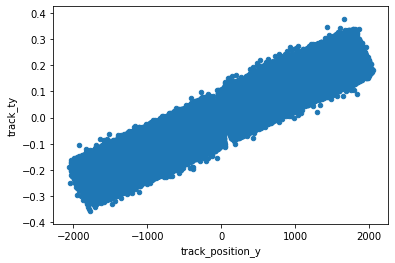

In [115]:
featuresT.plot.scatter(x='track_position_y', y='track_ty')
featuresF.plot.scatter(x='track_position_y', y='track_ty')

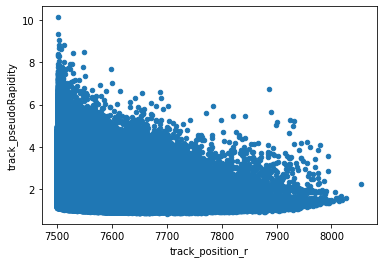

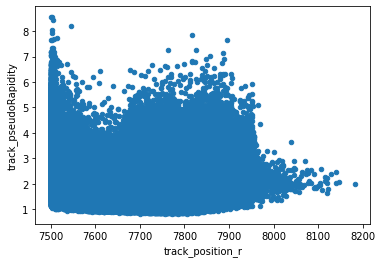

In [118]:
featuresT.plot.scatter(x='track_position_r', y='track_pseudoRapidity')
featuresF.plot.scatter(x='track_position_r', y='track_pseudoRapidity')